# name = Divyanshu singh

# id = 56

# batch = DS2306

.

# medical_cost_insurance

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('medical_cost_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df['sex'].nunique()

2

In [6]:
df['smoker'].nunique()

2

In [7]:
df['region'].nunique()

4

In [8]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
df['sex']= pd.factorize(df.sex)[0]
df['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [10]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [11]:
df['smoker']= pd.factorize(df.smoker)[0]
df['smoker'].value_counts()

1    1064
0     274
Name: smoker, dtype: int64

In [12]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [13]:
df['region'] = pd.factorize(df.region)[0]
df['region'].value_counts()

1    364
0    325
2    325
3    324
Name: region, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [15]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.795217,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


.

In [16]:
import seaborn as sns

<Axes: >

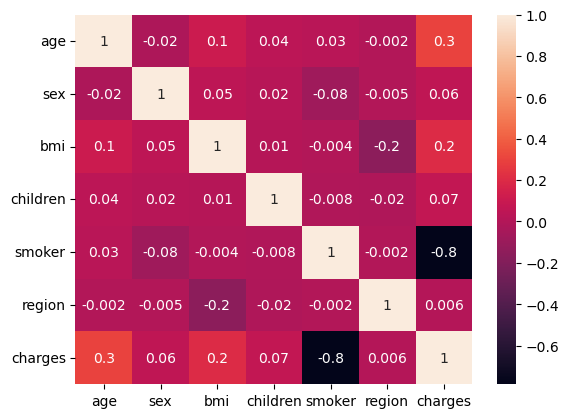

In [17]:
correlation = df.corr()
sns.heatmap(correlation, fmt='.1g', linecolor = 'red', annot=True)

.

In [18]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

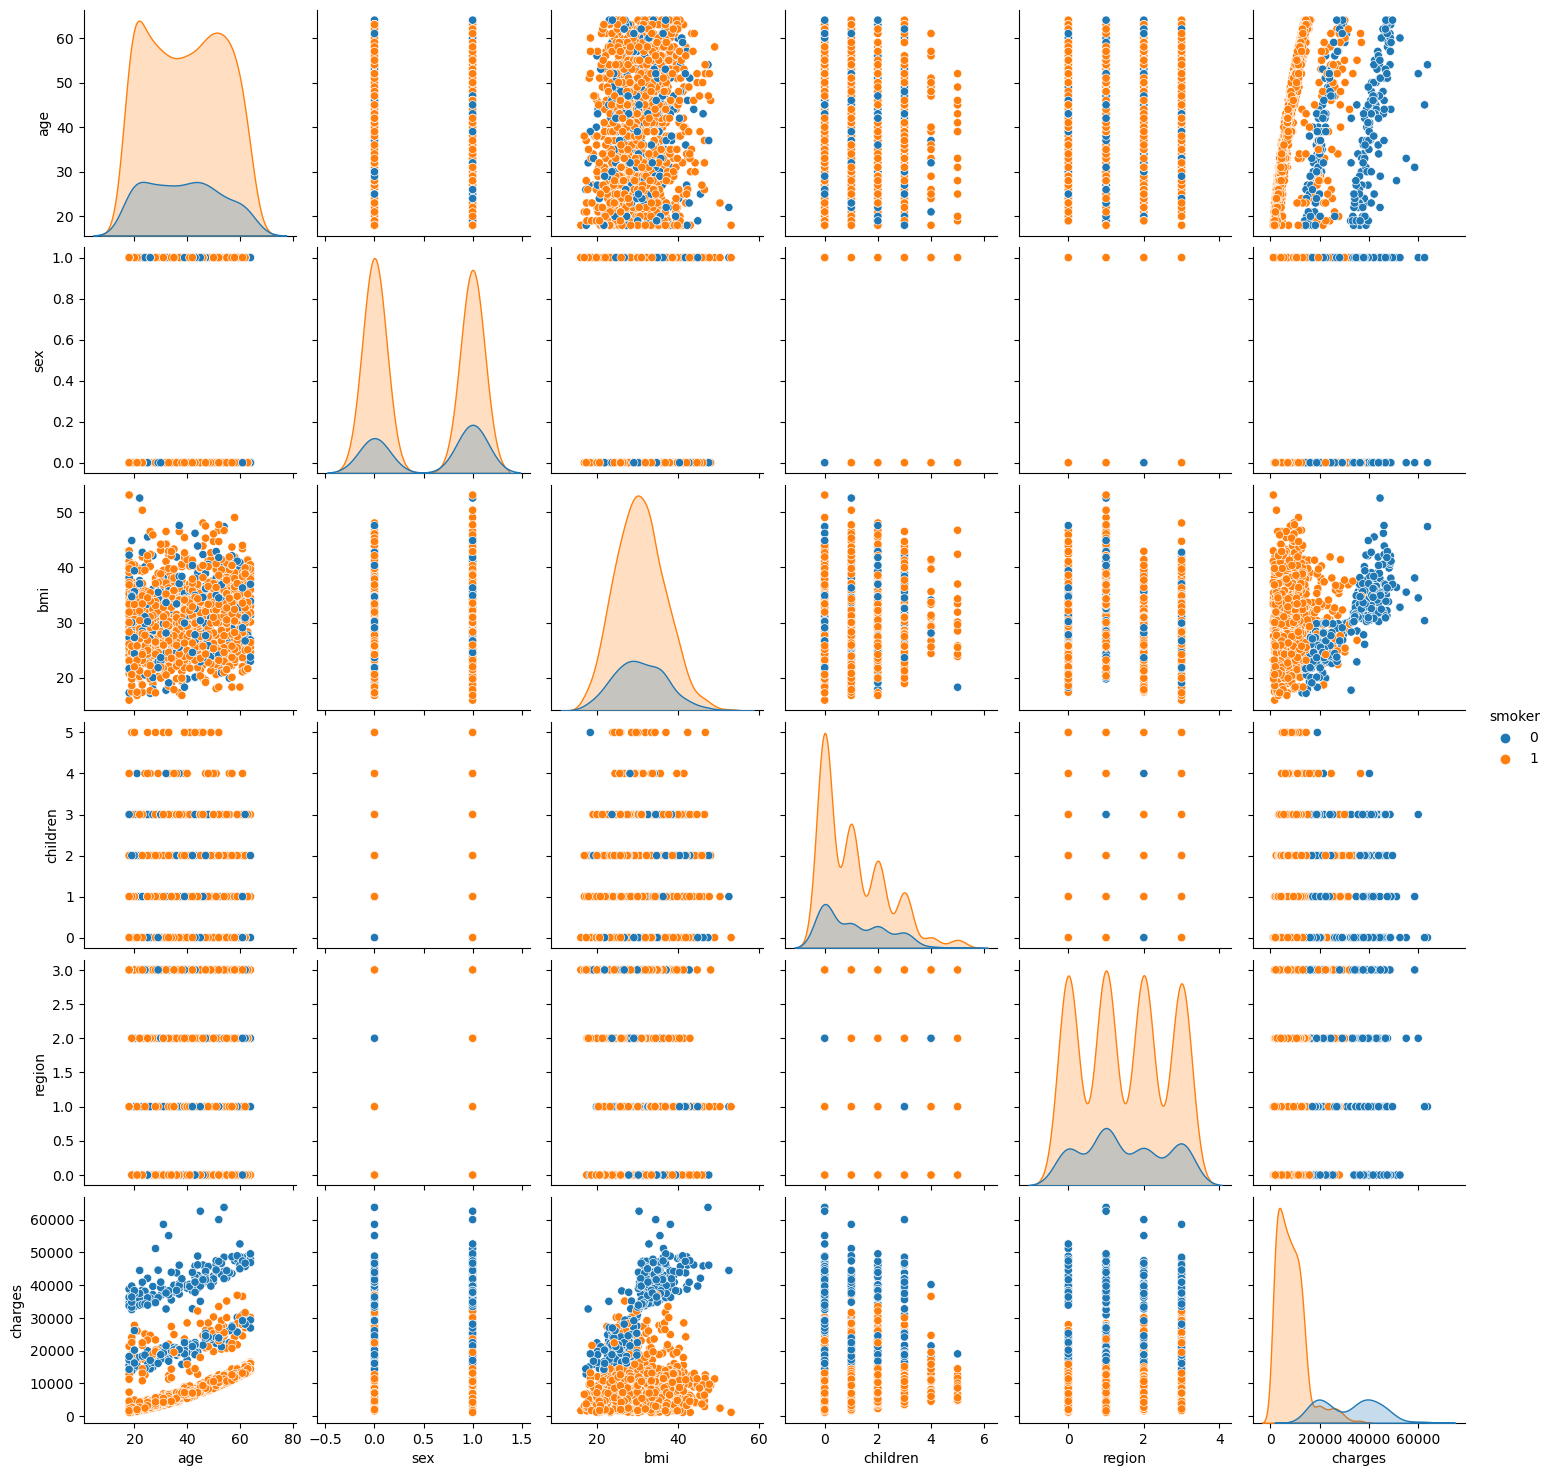

In [19]:
sns.pairplot(df,hue='smoker')

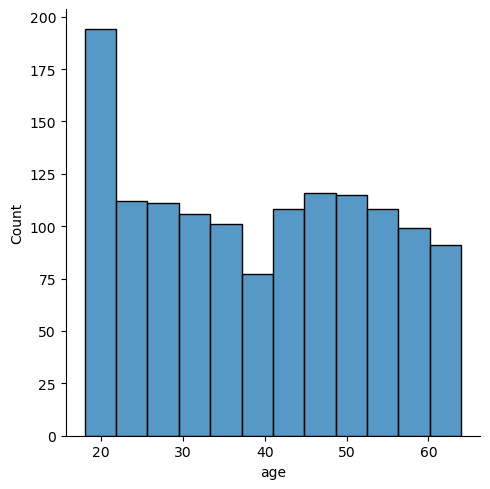

In [20]:
sns.displot(data=df, x='age')

<Axes: xlabel='age', ylabel='charges'>

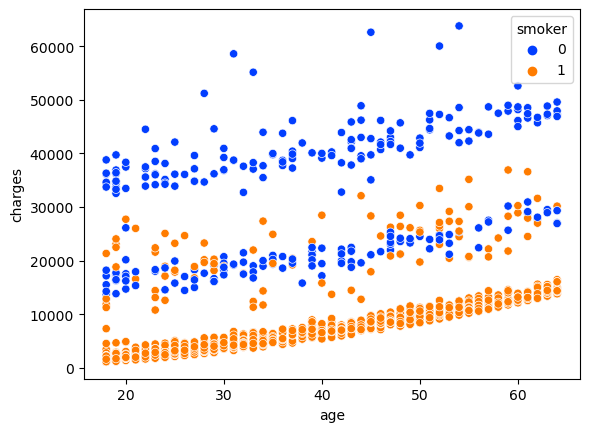

In [21]:
sns.scatterplot(x='age',y='charges',data=df , hue='smoker' , palette='bright')

.

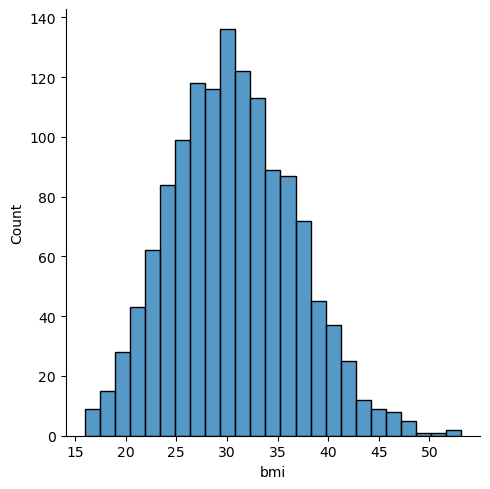

In [22]:
sns.displot(data=df, x='bmi')

<Axes: xlabel='bmi', ylabel='charges'>

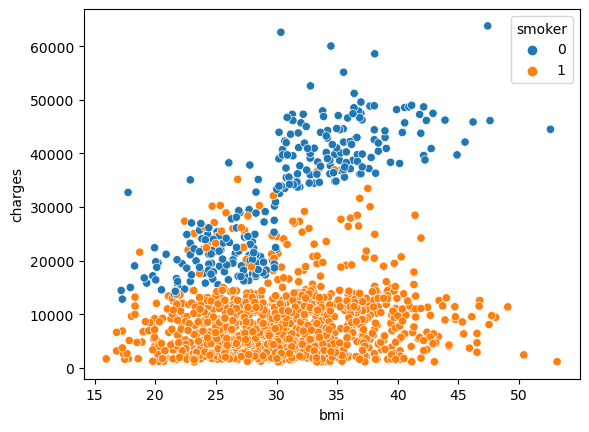

In [23]:
sns.scatterplot(x='bmi',y='charges',data=df , hue='smoker')

<Axes: >

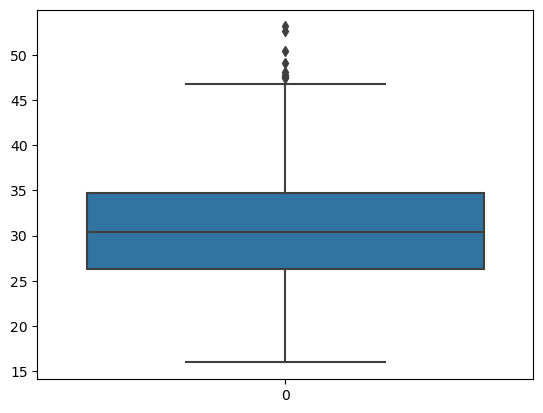

In [24]:
sns.boxplot(df['bmi'])

there are outliers present in bmi it was shown in describe function 
and now its confirm through boxplot

.

# iqr method

In [25]:
q1 = df['bmi'].quantile(.25)
q3 = df['bmi'].quantile(.75)

iqr = q3-q1
low = q1-1.5*iqr
up = q3+1.5*iqr

print(low)
print(up)

13.7
47.290000000000006


In [26]:
new_df = df.loc[(df['bmi']<up) & (df['bmi']>low)]
print(len(df))
print(len(new_df))

1338
1329


.

In [27]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker     -1.464766
region      0.038101
charges     1.515880
dtype: float64

In [28]:
new_df.skew()

age         0.058413
sex        -0.016573
bmi         0.157180
children    0.936628
smoker     -1.471424
region      0.031651
charges     1.500577
dtype: float64

.

<Axes: >

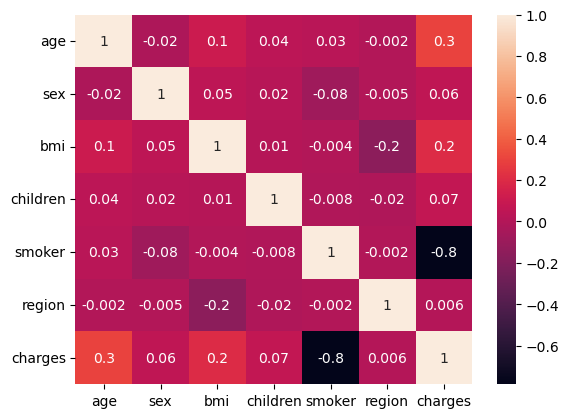

In [29]:
correlation = df.corr()
sns.heatmap(correlation, fmt='.1g', linecolor = 'red', annot=True)

<Axes: >

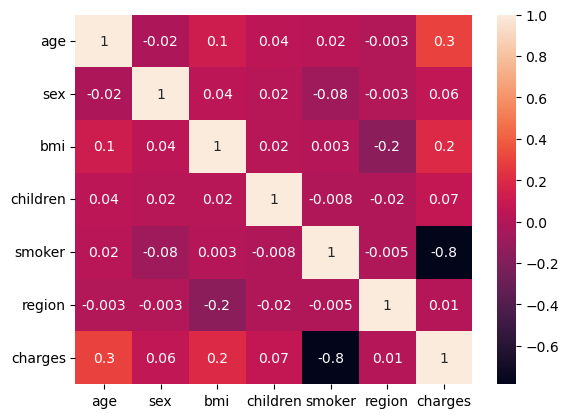

In [30]:
correlation = new_df.corr()
sns.heatmap(correlation, fmt='.1g', linecolor = 'red', annot=True)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# df

In [32]:
x= df.drop('charges',axis=1)
y= df['charges']

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [34]:
x_train.shape

(936, 6)

In [35]:
x_test.shape

(402, 6)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
svm = SVR()
svm.fit(x_train,y_train)


SVR()

In [38]:
lr= LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [39]:
rfr= RandomForestRegressor()
rfr.fit(x_train,y_train)


RandomForestRegressor()

In [40]:
gbr= GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [41]:
y_pred1 = svm.predict(x_test)
y_pred2 = lr.predict(x_test)
y_pred3 = rfr.predict(x_test)
y_pred4 = gbr.predict(x_test)

In [42]:
from sklearn import metrics
from sklearn.metrics import accuracy_score , confusion_matrix

In [43]:
svm1 = metrics.r2_score(y_test,y_pred1)
svm1

-0.08170794773255219

In [44]:
lr2 = metrics.r2_score(y_test,y_pred2)
lr2

0.7694415927057693

In [45]:
rfr3 = metrics.r2_score(y_test,y_pred3)
rfr3

0.8529529920654574

In [46]:
gbr4 = metrics.r2_score(y_test,y_pred4)
gbr4

0.8691639800395429

# GradientBoostingRegressor gives the best performance

# new_df

In [47]:
x2= new_df.drop('charges',axis=1)
y2= new_df['charges']

x_train,x_test,y_train,y_test = train_test_split(x2,y2, test_size=0.3, random_state=42)
print(x_train.shape)
print(x_test.shape)

(930, 6)
(399, 6)


In [48]:
svm = SVR()
svm.fit(x_train,y_train)

lr= LinearRegression()
lr.fit(x_train,y_train)

rfr= RandomForestRegressor()
rfr.fit(x_train,y_train)

gbr= GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [49]:
y_preda = svm.predict(x_test)
y_predb = lr.predict(x_test)
y_predc = rfr.predict(x_test)
y_predd = gbr.predict(x_test)

In [50]:
svma = metrics.r2_score(y_test,y_preda)
svma

-0.07018426873340622

In [51]:
lrb = metrics.r2_score(y_test,y_predb)
lrb

0.7716630723497743

In [52]:
rfrc = metrics.r2_score(y_test,y_predc)
rfrc

0.8362618231460421

In [53]:
gbrd = metrics.r2_score(y_test,y_predd)
gbrd

0.8600283315761992

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
recheck = cross_val_score(svm,x,y)
print(recheck)
print(recheck.mean())


[-0.11535857 -0.11037308 -0.07992918 -0.10416852 -0.10829545]
-0.10362495985825126


In [56]:
recheck = cross_val_score(lr,x,y)
print(recheck)
print(recheck.mean())


[0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ]
0.7472559473580954


In [57]:
recheck = cross_val_score(rfr,x,y)
print(recheck)
print(recheck.mean())


[0.84926824 0.77486337 0.86457641 0.82606821 0.84869856]
0.8326949597644859


In [58]:
recheck = cross_val_score(gbr,x,y)
print(recheck)
print(recheck.mean())


[0.87519987 0.79177595 0.89421047 0.84919251 0.85971592]
0.8540189433121006


.

# GradientBoostingRegressor is the best

.